In [25]:
import pandas as pd
from data_preprocess import create_sequences, getdata
from model import getLSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

    

In [26]:
X,y,scaler=getdata('./yfinance_2020-2024_day_amazon.csv')
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size],y[:train_size]
X_test, y_test = X[train_size:],y[train_size:]
model=getLSTM((X_train.shape[1], X_train.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split and early stopping
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,  # 20% of the training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')
best_epoch = len(history.history['loss'])
print(f"The best epoch was: {best_epoch}")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# print(X_train[0:5])

Epoch 1/500


C:\Users\15596\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2300 - val_loss: 0.0133
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - val_loss: 0.0189
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - val_loss: 0.0126
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0109
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0092
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0085
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 0.0067
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0062
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 0.0060
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 0.0057
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - val_l

In [27]:
print(X_test[0])
print(y_test[0])

[[0.19369838]
 [0.17403262]
 [0.15675342]
 [0.15073915]
 [0.16916389]
 [0.17069129]
 [0.18462924]
 [0.15589427]
 [0.14682505]
 [0.12181329]
 [0.13336454]
 [0.13365092]
 [0.11150305]
 [0.11398516]
 [0.11847203]
 [0.0988062 ]
 [0.09842433]
 [0.12486816]
 [0.11388968]
 [0.11198041]
 [0.11551257]
 [0.09956994]
 [0.0850593 ]
 [0.10128831]
 [0.12467719]
 [0.13727856]
 [0.17393714]
 [0.16353142]
 [0.15169379]
 [0.17937863]]
0.16114479560857786


In [28]:
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
y_train = y_train.reshape(-1, 1)
y_train_unscaled = scaler.inverse_transform(y_train)
test_predictions_unscaled = scaler.inverse_transform(test_predictions)
y_test = y_test.reshape(-1, 1)
y_test_unscaled = scaler.inverse_transform(y_test)
# Calculate MAPE for train and test sets
train_mape = np.mean(np.abs((y_train_unscaled - train_predictions_unscaled) / y_train_unscaled)) * 100
test_mape = np.mean(np.abs((y_test_unscaled - test_predictions_unscaled) / y_test_unscaled)) * 100

print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Train MAPE: 2.19%
Test MAPE: 1.59%


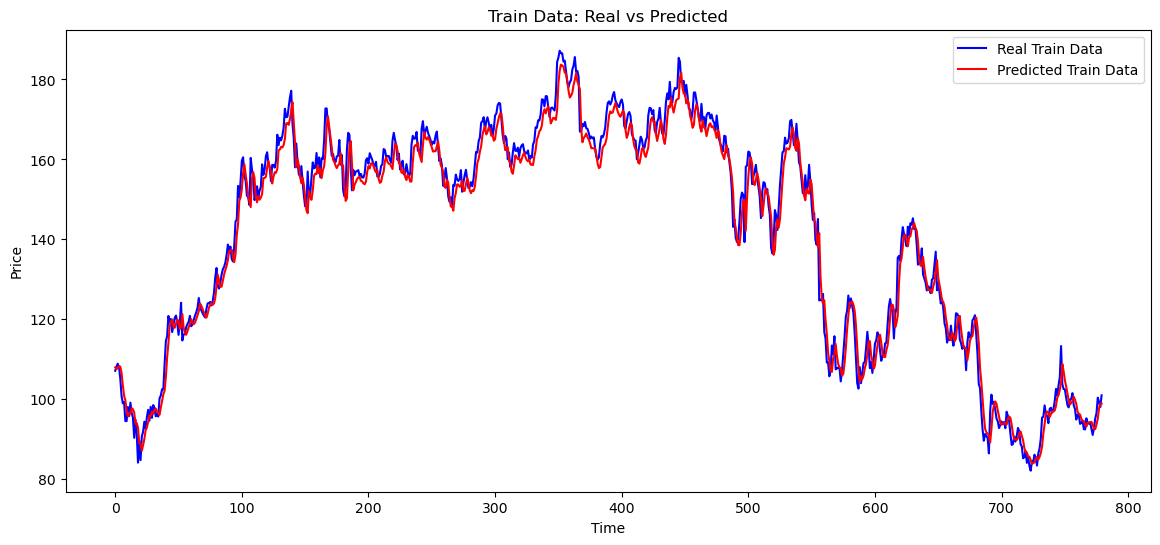

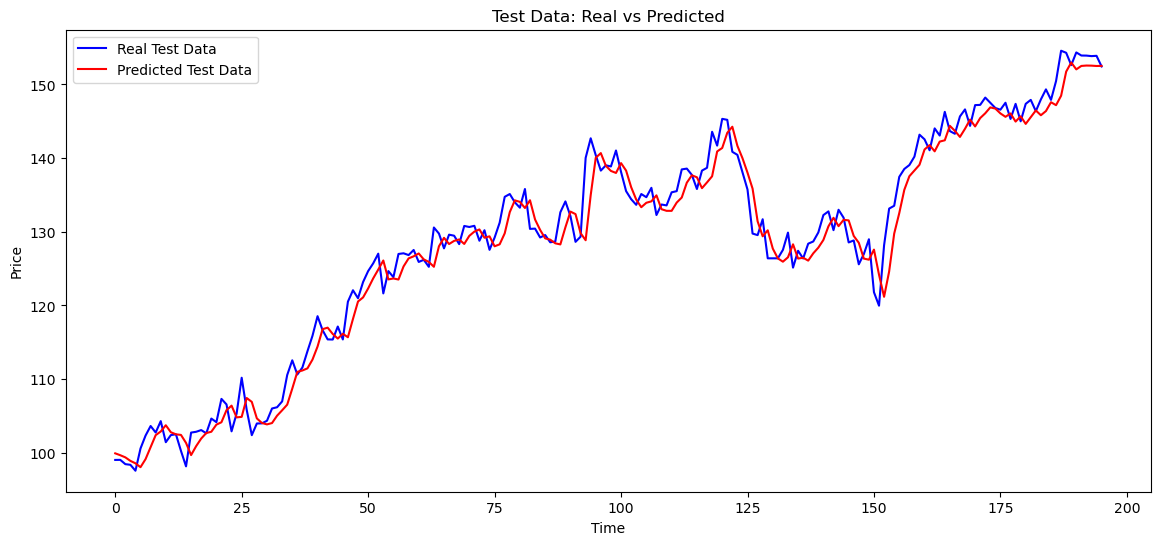

In [29]:
import matplotlib.pyplot as plt

# 假设 train_predictions、y_train_unscaled、test_predictions、y_test_unscaled 已经正确反归一化

# 绘制训练数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_train_unscaled, label="Real Train Data", color="blue")
plt.plot(train_predictions_unscaled, label="Predicted Train Data", color="red")
plt.title("Train Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# 绘制测试数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled, label="Real Test Data", color="blue")
plt.plot(test_predictions_unscaled, label="Predicted Test Data", color="red")
plt.title("Test Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [30]:
model.save('model.h5')

In [31]:
original_data = pd.read_csv('yfinance_2020-2024_day_amazon.csv', usecols=['Date'])
original_data['Date'] = pd.to_datetime(original_data['Date'])

# 3. 将预测结果与日期配对，假设 train_predictions 是您的预测结果
predictions_df = pd.DataFrame({
    'Date': original_data['Date'][-len(y_test_unscaled):],  # 使用原始数据中的日期
    'Predicted_Close': test_predictions_unscaled.flatten()  # 确保预测结果是一维
})

# 4. 保存为 CSV 文件
predictions_df.to_csv('predictions_with_dates_amazon.csv', index=False)